# Quick look summaries of the mouse and human atalas datasets

In [74]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd

import random
import os

In [40]:
import seaborn as sns

In [41]:
WORKDIR="/workdir/dwm269/scMuscle2"
os.chdir(WORKDIR)

In [42]:
from scripts.py.scantils import *
# from scripts.py.scanplots import *

Load mouse data...

In [43]:
mouse = sc.read_h5ad("data/atlas/mus_musculus.h5ad")
mouse.shape

(1350364, 56980)

Load human data...

In [44]:
human = sc.read_h5ad("data/atlas/homo_sapiens.h5ad")
human.shape

(969682, 62703)

*Note* - loading both datasets requires ~100Gb of RAM

Quick preprocessing on each dataset for visualization

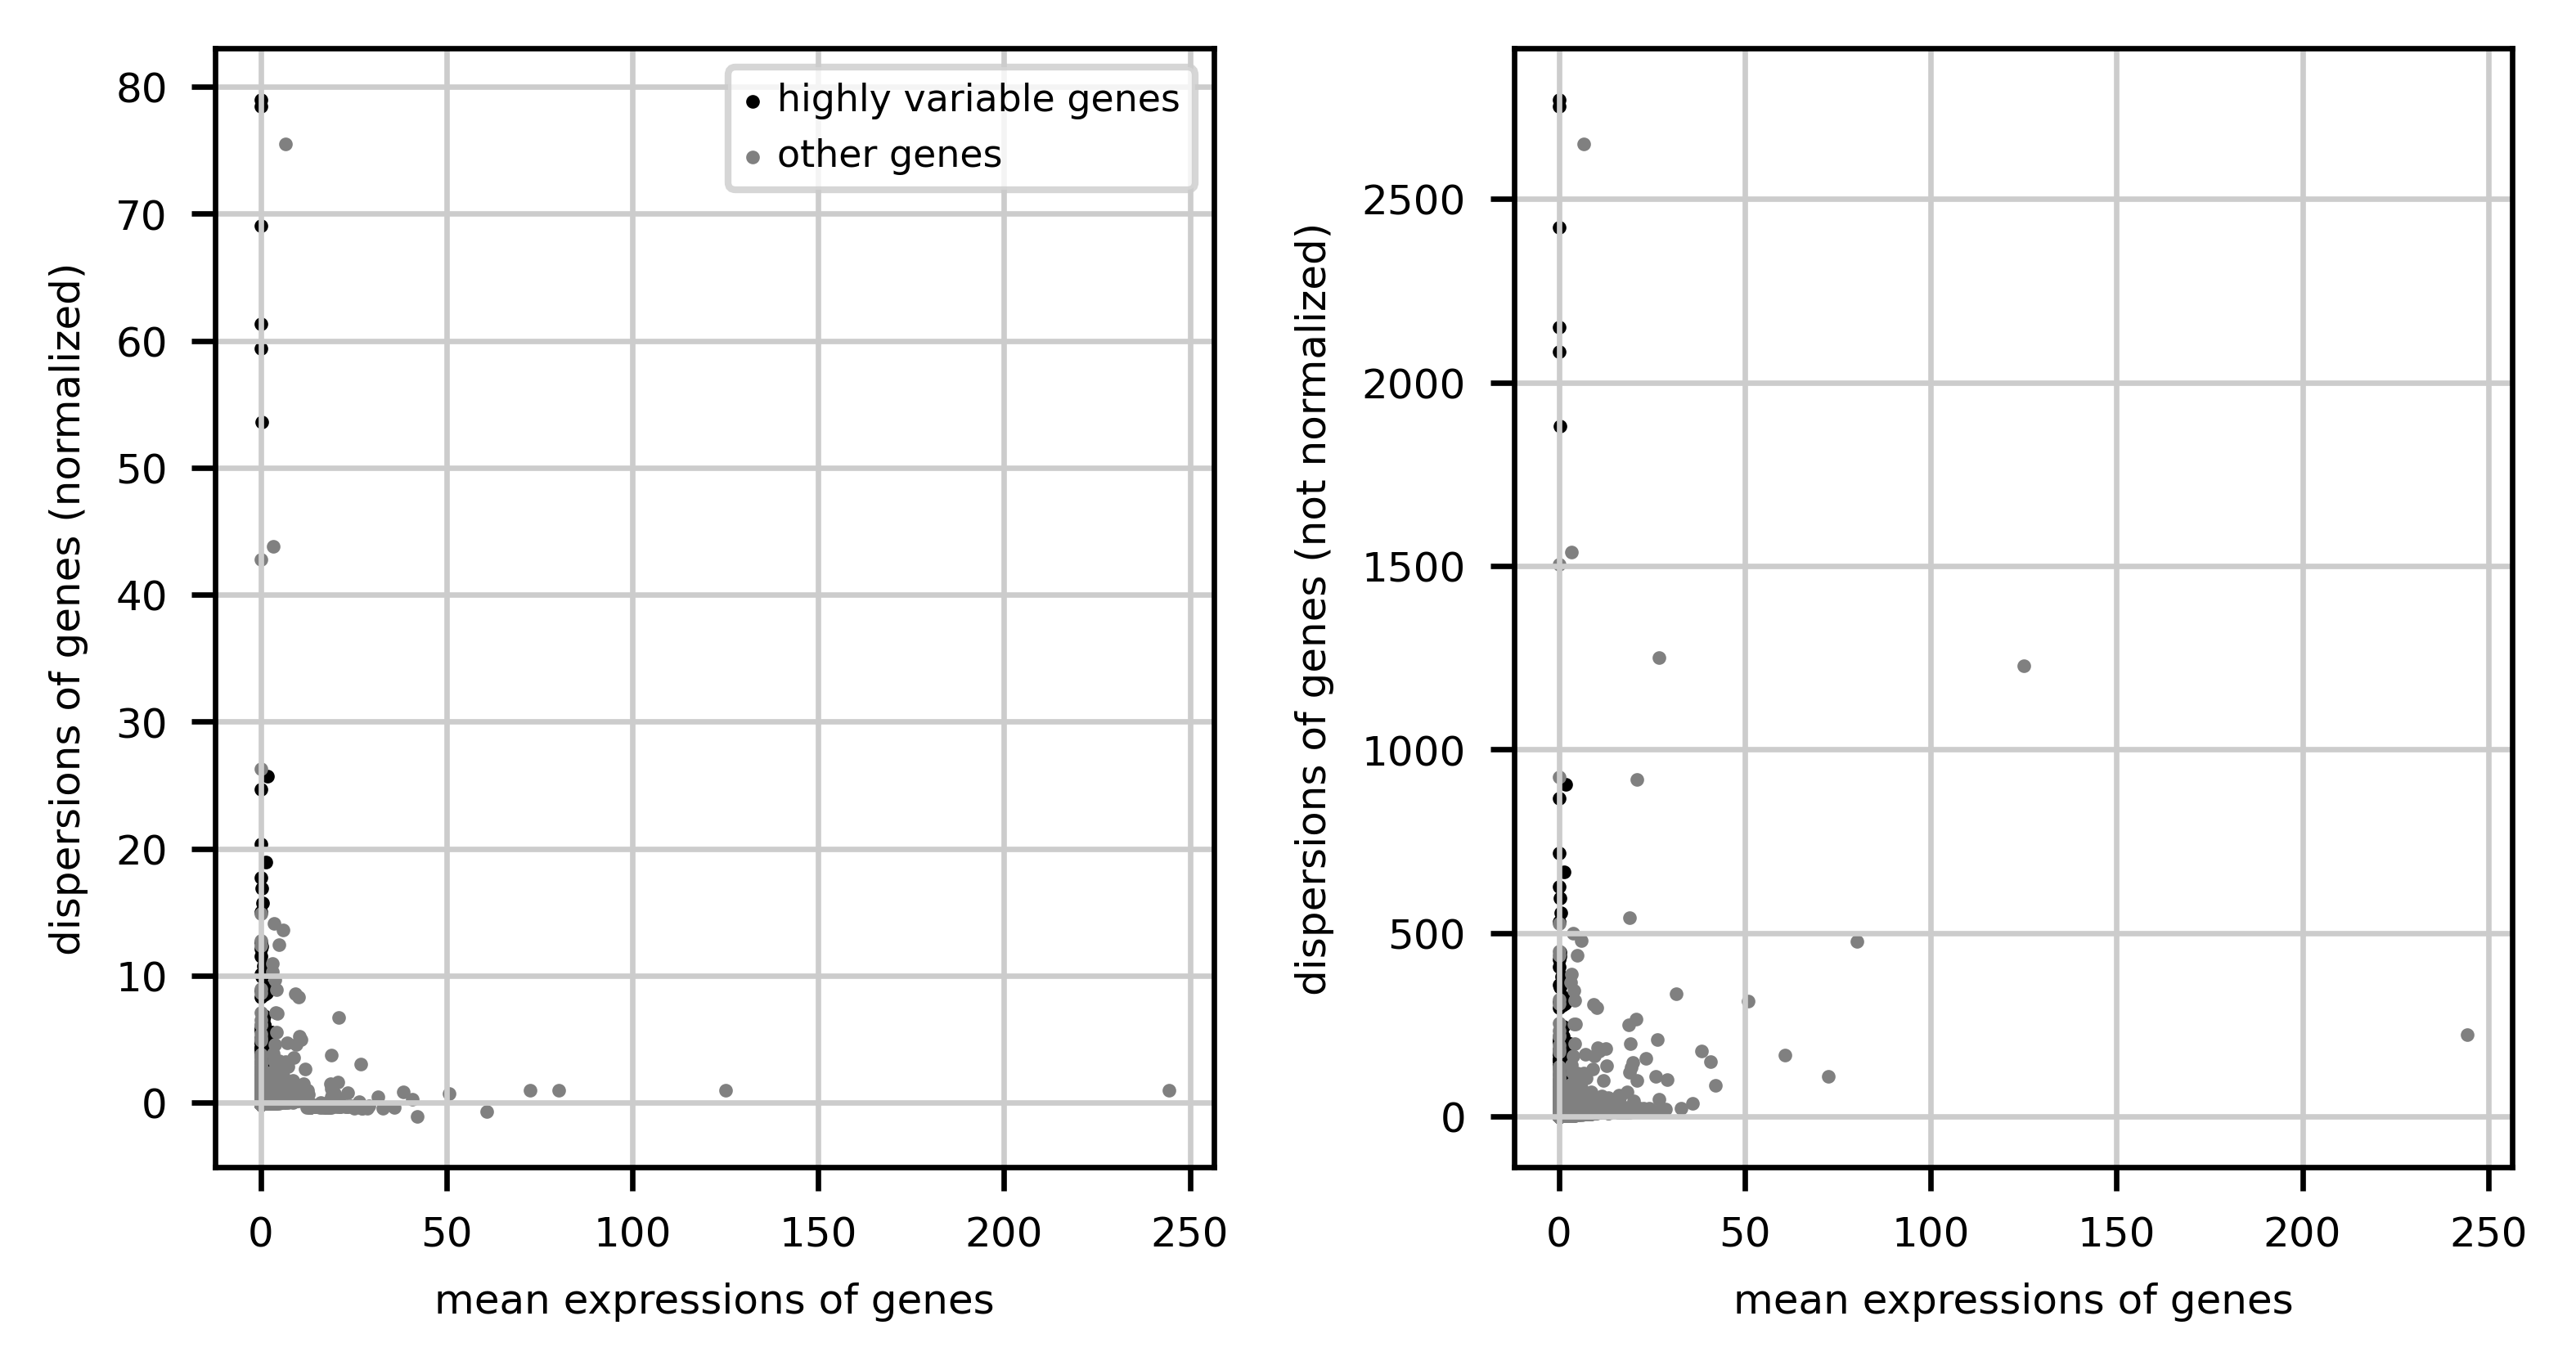

In [45]:
sc.pp.recipe_seurat(
    mouse,
    plot=True
)

In [46]:
sc.tl.pca(
    mouse,
    svd_solver='arpack'
)

In [47]:
sc.pp.neighbors(
    mouse,
    n_pcs=10
)

In [48]:
sc.tl.umap(
    mouse
)

Set color map for 'GSM.accession' values (sample IDs)

In [71]:
palette=sns.color_palette(
    "hls", 
    len(mouse.obs["GSM.accession"].unique())
)
random.shuffle(palette)
mouse.uns['GSM.accession_colors'] =  ["#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in palette]

Plot the UMAP!

/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


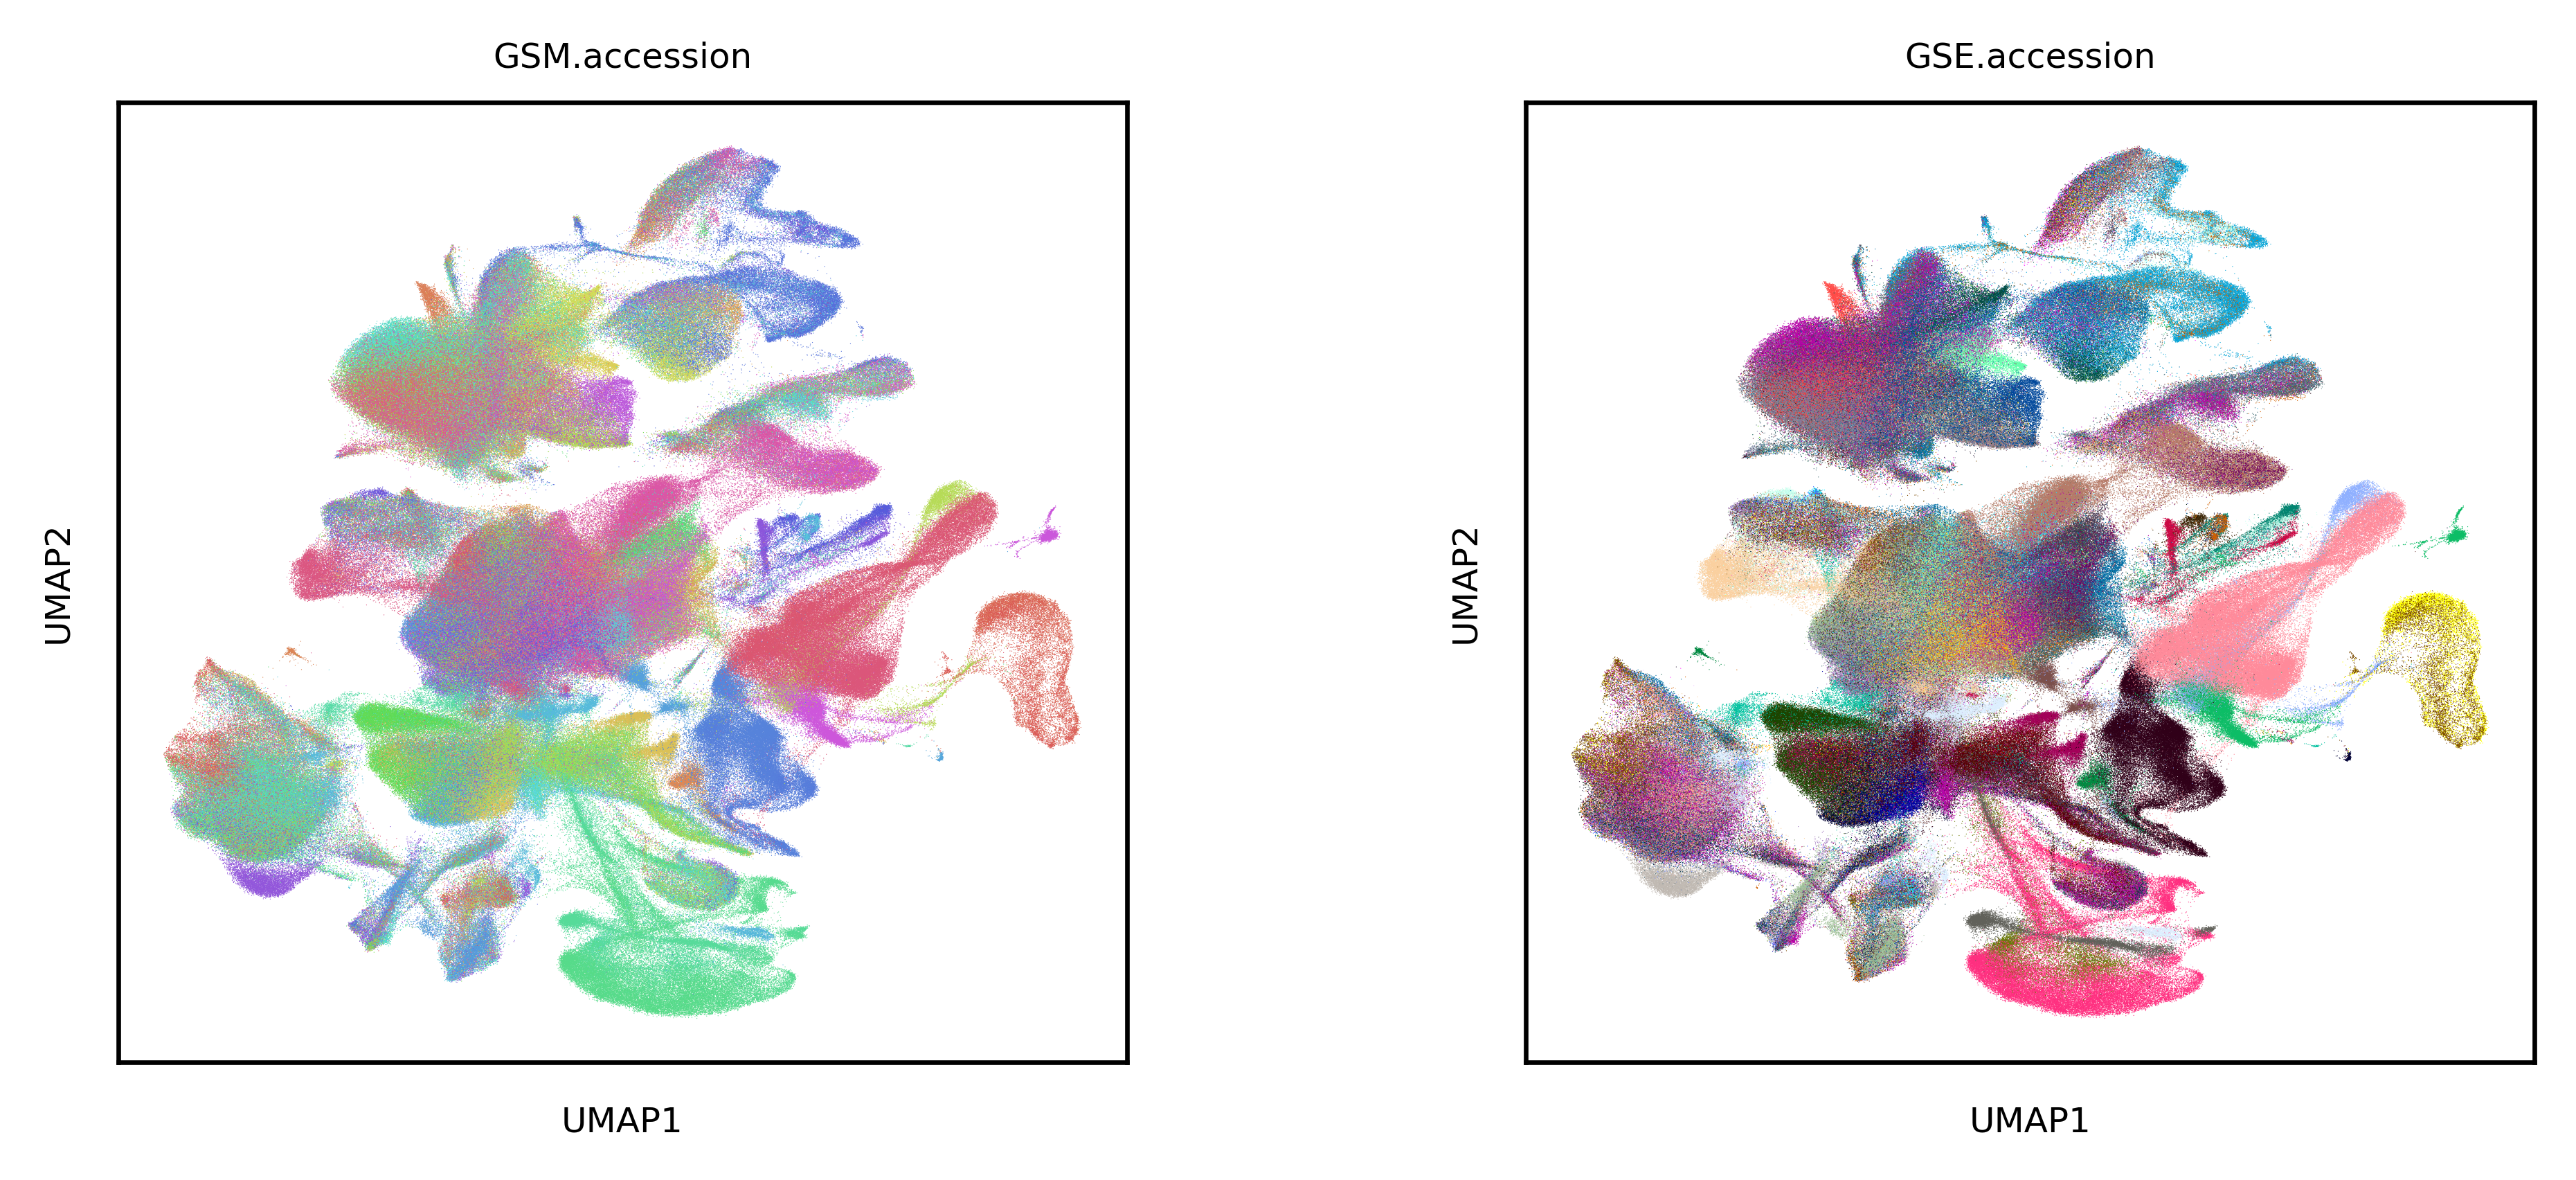

In [72]:
sc.set_figure_params(
    figsize=(3,3),
    fontsize=6,
    transparent=False,
    dpi=300
)

sc.pl.umap(
    mouse,
    legend_loc=None, #"on data"
    # palette=sns.color_palette(
    #     "hls", 
    #     len(mouse.obs["GSM.accession"].unique())
    # ),
    color=["GSM.accession","GSE.accession"],
    save="mouse_gsm_umap.png"
)

Repeat w/ human dataset...

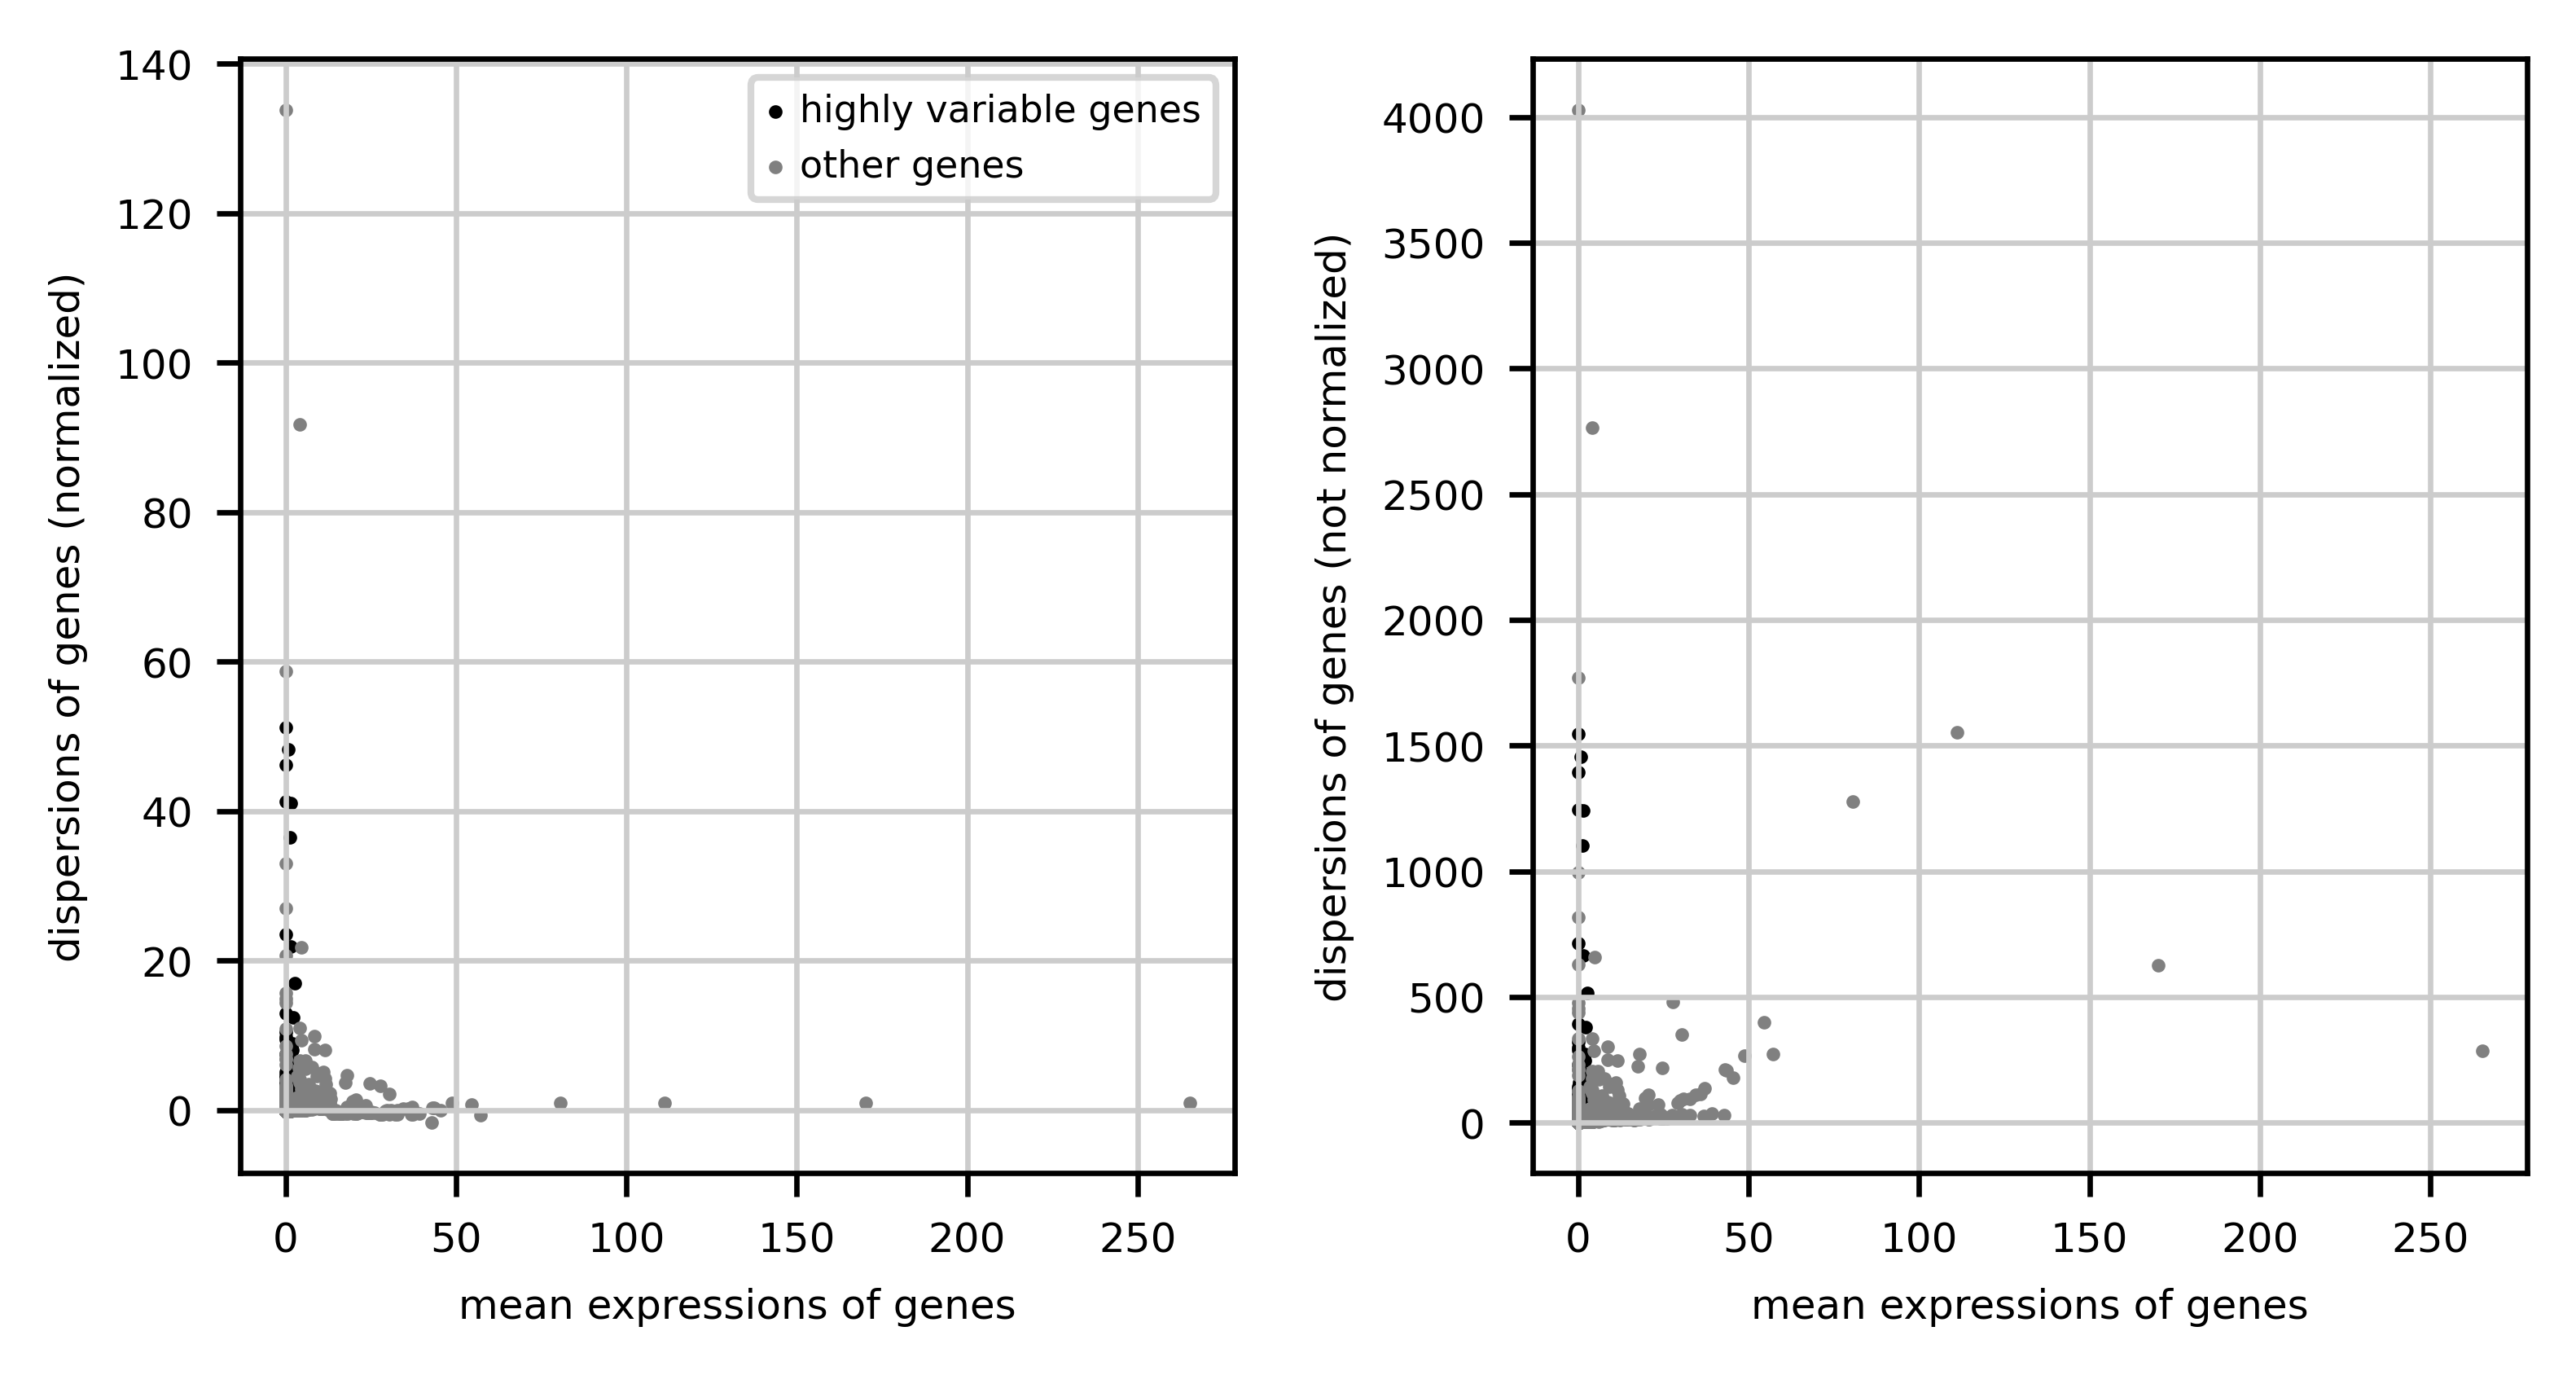

In [51]:
sc.pp.recipe_seurat(
    human,
    plot=True
)

In [52]:
sc.tl.pca(
    human,
    svd_solver='arpack'
)

In [53]:
sc.pp.neighbors(
    human,
    n_pcs=10
)

In [54]:
sc.tl.umap(
    human
)

In [75]:
palette=sns.color_palette(
    "hls", 
    len(human.obs["GSM.accession"].unique())
)
random.shuffle(palette)
human.uns['GSM.accession_colors'] =  ["#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b in palette]

In [76]:
sc.set_figure_params(
    figsize=(3,3),
    fontsize=6,
    transparent=False,
    dpi=300
)

sc.pl.umap(
    human,
    legend_loc=None, # "right margin", #"on data"
    # palette=sns.color_palette(
    #     "hls", 
    #     len(human.obs["GSM.accession"].unique())
    # ),
    color=["GSM.accession","GSE.accession"],
    save="human_gsm_umap.png"
)

/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/dwm269/miniconda3/envs/scm2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Export datasets

In [63]:
mouse.write_h5ad(
    "data/atlas/mus_musculus_pp.h5ad"
)

TypeError: No method has been defined for writing <class 'seaborn.palettes._ColorPalette'> elements to <class 'h5py._hl.group.Group'>

Above error raised while writing key 'GSM.accession_colors' of <class 'h5py._hl.group.Group'> to /

In [ ]:
human.write_h5ad(
    "data/atlas/homo_sapiens_pp.h5ad"
)